<a href="https://colab.research.google.com/github/Siriyaphorn/colab-machine-learning/blob/main/ploynomial%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*`# New Section`

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.api as sm

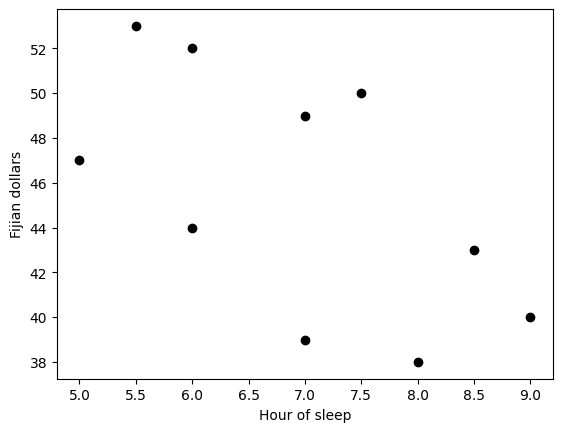

In [19]:
sleepHours = [5,5.5,6,6,7,7,7.5,8,8.5,9]
dollars = [47,53,52,44,39,49,50,38,43,40]

#start by showing the data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')
plt.xlabel('Hour of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [20]:
## manual regression via least-squares fitting

#create the design matrix
desmat = np.vstack((np.ones(10),sleepHours)).T
print(desmat)

#compute the beta parameters (regression coeffience)
beta = np.linalg.lstsq(desmat,dollars,rcond=None)[0]
print(beta)

# predicted data values
yHat = desmat@beta

[[1.  5. ]
 [1.  5.5]
 [1.  6. ]
 [1.  6. ]
 [1.  7. ]
 [1.  7. ]
 [1.  7.5]
 [1.  8. ]
 [1.  8.5]
 [1.  9. ]]
[62.84737679 -2.49602544]


Text(0, 0.5, 'Fijian dollars')

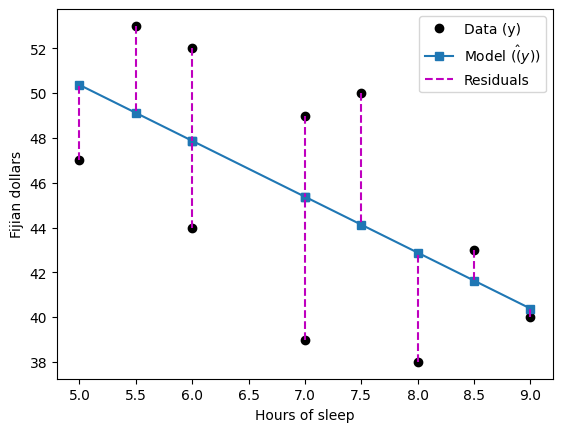

In [21]:
## show the predicted results on top of the 'real' data

# show previous data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')

#predicted results
plt.plot(sleepHours,yHat,'s-')

#show the residuals
for i in range(10):
  plt.plot([sleepHours[i],sleepHours[i]],[dollars[i],yHat[i]],'m--')

plt.legend(('Data (y)','Model ($\^(y)$)','Residuals'))

plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
# plt.show()

In [22]:
## now with scipy
slope,intercept,r,p,std_err = stats.linregress(sleepHours,dollars)
print(intercept,slope)
print(beta)

62.84737678855326 -2.4960254372019075
[62.84737679 -2.49602544]


# **Multiple regression**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [24]:
## example:effects of sleep and study hours on exam scores
### create the data

exam_scores = []
for ei in range(5):
    exam_scores = np.hstack((exam_scores,60*np.ones(6)+np.linspace(-1,5,6)*ei))

hours_studied = np.tile(np.linspace(2,8,6),5)
ave_sleep_hrs = np.linspace(6,10,30)

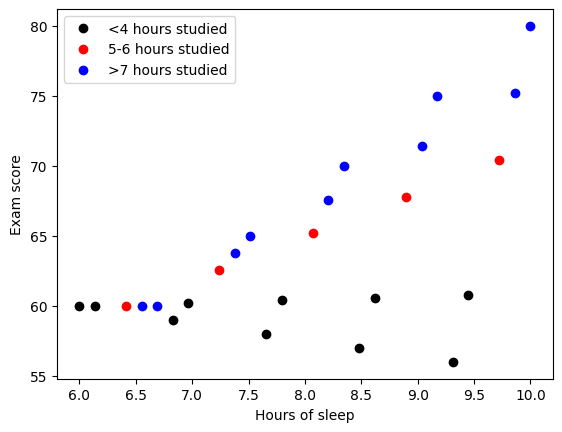

In [25]:
## plot the data
### stratify than 4 hours studied

#fewer than 4 hours studied
plotidx = hours_studied < 4.1
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ko',markerfacecolor='k')

#5-6 hours studied
plotidx = np.logical_and(hours_studied>4.9 , hours_studied<6.1)
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ro',markerfacecolor='r')

#more than 6 hours
plotidx =  hours_studied>6
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'bo',markerfacecolor='b')

plt.xlabel('Hours of sleep')
plt.ylabel('Exam score')
plt.legend(('<4 hours studied','5-6 hours studied','>7 hours studied'))

In [30]:
## multiple regression

#build the design matrix
desmat = np.vstack((np.ones((30,)),ave_sleep_hrs,hours_studied,ave_sleep_hrs*hours_studied)).T
print(desmat)

multireg = sm.OLS(endog=exam_scores,exog=desmat[:,0:-1]).fit()
multireg.summary()

[[ 1.          6.          2.         12.        ]
 [ 1.          6.13793103  3.2        19.64137931]
 [ 1.          6.27586207  4.4        27.6137931 ]
 [ 1.          6.4137931   5.6        35.91724138]
 [ 1.          6.55172414  6.8        44.55172414]
 [ 1.          6.68965517  8.         53.51724138]
 [ 1.          6.82758621  2.         13.65517241]
 [ 1.          6.96551724  3.2        22.28965517]
 [ 1.          7.10344828  4.4        31.25517241]
 [ 1.          7.24137931  5.6        40.55172414]
 [ 1.          7.37931034  6.8        50.17931034]
 [ 1.          7.51724138  8.         60.13793103]
 [ 1.          7.65517241  2.         15.31034483]
 [ 1.          7.79310345  3.2        24.93793103]
 [ 1.          7.93103448  4.4        34.89655172]
 [ 1.          8.06896552  5.6        45.1862069 ]
 [ 1.          8.20689655  6.8        55.80689655]
 [ 1.          8.34482759  8.         66.75862069]
 [ 1.          8.48275862  2.         16.96551724]
 [ 1.          8.62068966  3.2 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     39.86
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           8.76e-09
Time:                        14:30:23   Log-Likelihood:                -74.492
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0556      3.832      9.409      0.000      28.193      43.918
x1             2.4167      0.477      5.071      0.000       1.439       3.395
x2             1.7222      0.278      6.203      0.000       1.153       2.292
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.004
Skew:                          -0.000   Prob(JB):                        0.998
Kurtosis:                       2.943   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
multireg = sm.OLS(endog=exam_scores,exog=desmat[:,0:-1]).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     39.86
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           8.76e-09
Time:                        15:21:24   Log-Likelihood:                -74.492
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0556      3.832      9.409      0.000      28.193      43.918
x1             2.4167      0.477      5.071      0.000       1.439       3.395
x2             1.7222      0.278      6.203      0.000       1.153       2.292
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.004
Skew:                          -0.000   Prob(JB):                        0.998
Kurtosis:                       2.943   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#inspect the correlations of the IVs
np.corrcoef(desmat[:,1:].T)

array([[1.        , 0.19731231, 0.49270769],
       [0.19731231, 1.        , 0.94068915],
       [0.49270769, 0.94068915, 1.        ]])